## DAML Project 3

The aims and goal of this project is to develop a simple particle detector in Geant4 (I), reconstruct data from this detector over a range of particle energies (200MeV->20GeV) and be able to distinguish between two different types of particle (electron and photon) (II). 

Then this reconstruction can be compared to the truth output of the simulation, allowing for calculation of the resolution for our energy/momentum measurements and our total efficiency ratio for particle classification. You should examine whether these results vary over a range of input energies, and show what happens here (aim for 70%) (III).

Then there is a discussion and attempt for improvement section, which asks for a lot of different things, which will be discussed at the time (IV).

## PART I

Creating the detector, we started with the basic model from checkpoint 9, and modified it, adding extra detectors. The source code for this will be kept in the folder 'GeantExample2Part1'

Here is the checkpoint 9 detector of lead and argon:
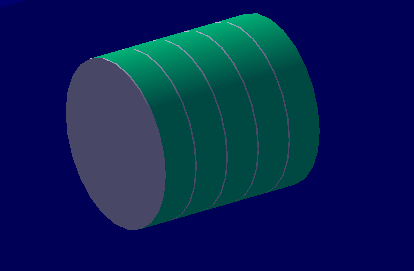
Where the gray is the lead and the greenis the argon.


This will be used as our hadronic detector, and we shall include an electromagnetic detector beforehand, which will be a large body of liquid argon that aborbs a significant amount of the low energy particles.

This was done by adding a large cylinder of argon to the front, and outputting the energy absorbed within the argon.


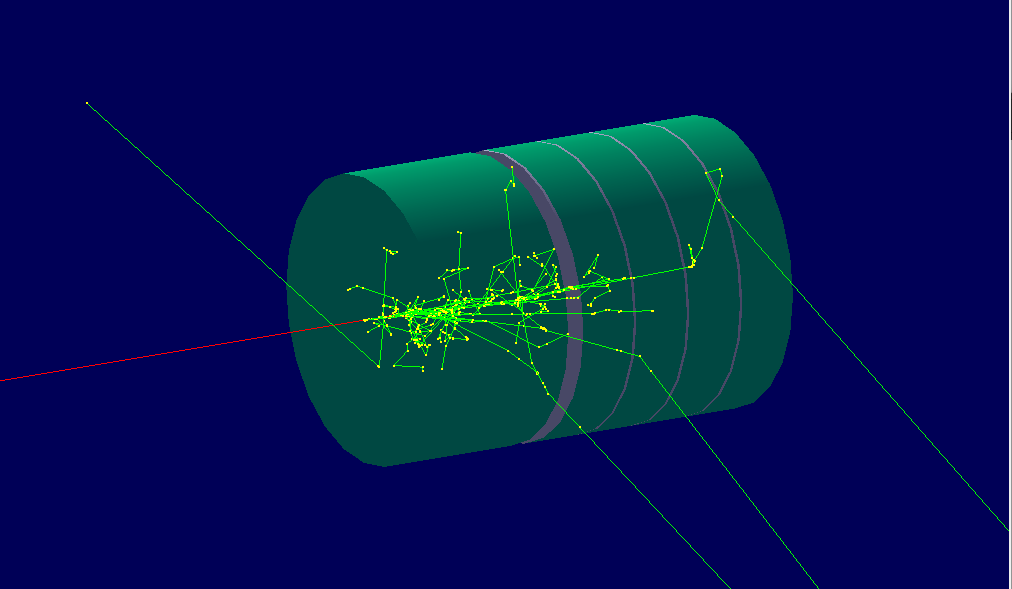

Next I moved the Liquid argon electromagnetic calorimeter back to leave no gap between it and the hadronic calorimeter, and added silicon wafers to take positional data, and will apply magnetic field to allow for use to know if the particles are charges or not.

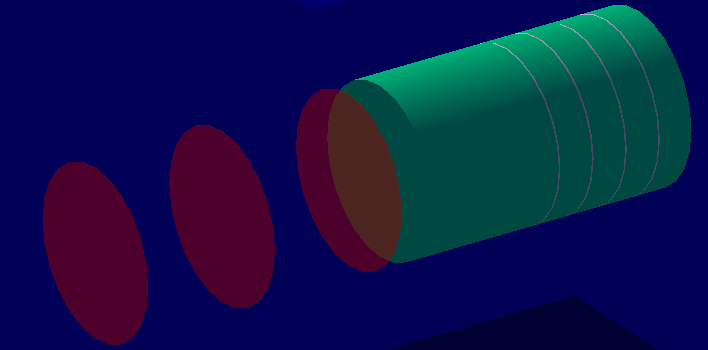

So we have the tracking component (silicon wafers), then the electromag calorimeter (big liquid argon section), followed by the hadronic calorimeter (lead + argon).

We can now print out the particles that come into contact with the silicon wafers, and the positions at which they hit said wafers. Using this allows us to determine the charge of our particle and its estimate momentum. This was done by adding an entirely new .cpp file (PositionFinder.cpp) and setting up the Geant4 simulation to allow for printing of the positions when in contact with a particle (including it as a sensitive detector, producing new tuple files for each detector).

Silicon wafers are 80.2cm apart, and have been made smaller to avoid bounceback collision (20.0cm in radius), to try and avoid bounceback of particles

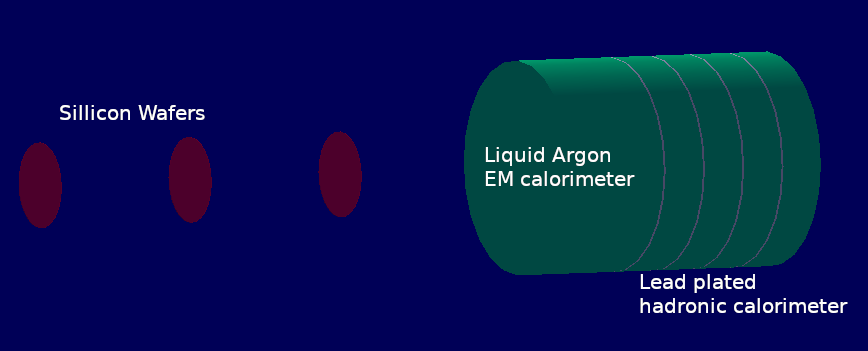

The silicon wafers were designed such that even for the lightest particle in consideration (electrons) the magnetic field isn't strong enough to completely push them off the wafers before hitting the calorimeter. (T = 0.065 in X, so electrons move in -Y, positrons in +Y). So everything will be detected when passing through, but the silicon wafers are set up only to detect charged particles positions and energies, which works for our interests in this project. 

An issue I've found is that for electrons, photons are produced on the first silicon detector and pass straight through the rest, emitting energy into the calorimeter. This isnt an issue when we're trying to determine the energy of the particle, but it produces an extra input in the first silicon detector (as the electron decays into electron + photon, which it counts as two 'detections'). While this is annoying, we can acknowledge its existent in our data analysis and continue as normal. It appears to be due to the particle hitting the first detector not perfectly 'perpendicularly' as can be seen in the data in later parts.

## PART II

From this, we will be able to determine the charge and an estimate of the momenta for our particles based on their positions on the silicon wafers, and then the energy from that deposited within the two calorimeters. We can try and compare the energy deposited in the calorimeter with the momenta estimated via the particle path, and discern between different charged particles based on their path through the silicon tracker.

The particles we'll be considering in this project are electrons, protons and positrons across a range of energy values (200MeV -> 20 GeV). This should allow us to build up an image of how effective our detector is at discerning between these particles based on energy/momenta/charge.

Each particle type was shot 100 times at the detector, with increases in energy of 200MeV each time (200MeV->20000MeV), the silicon detectors have separate csv files for each detector, with each gunshot being labelled as an 'ID', and the possibility of multiple products. The energy output in the hadronic and EM calorimeter are both output to the same file and saved based on the energy input. So a 200MeV beam is event0, 400MeV beam is event1, etc. This is done by updating gun energy in GeneratorAction.cpp and changing run.mac. Vis manager has also been removed in main.cpp to stop visualisation and increase the efficiency of data collection.

These data files were collected to allow for reconstruction of the individual particles. 


Particle drawn information

e- red

e+ red

mu- pink

mu+ pink

gamma green

neutron yellow

proton cyan

nu_e grey

